[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/notebooks/02_pygenomeviz_practical_usage.ipynb)

If you are using Colab, first install pygenomeviz with pip command. Then run `RESTART RUNTIME` if necessary to activate the newly installed packages.

In [1]:
# %pip install pygenomeviz

## Single Genome Track Visualization from Genbank file

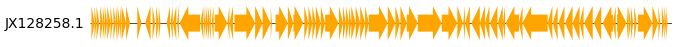

In [2]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

# Load single genbank file
gbk_files, _ = load_dataset("phage")
gbk = Genbank(gbk_files[0])

# Visualize genbank features
gv = GenomeViz()
track = gv.add_feature_track(gbk.name, gbk.genome_length)
track.add_genbank_features(gbk)

fig = gv.plotfig(dpi=50)


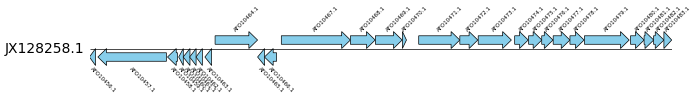

In [3]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

# Load single genbank file (Restrict genomic range)
gbk_files, _ = load_dataset("phage")
gbk = Genbank(gbk_files[0], min_range=10000, max_range=30000)

# Visualize genbank features
gv = GenomeViz()
track = gv.add_feature_track(gbk.name, gbk.genome_length)
track.add_genbank_features(gbk, label_type="protein_id", plotstyle="arrow", facecolor="skyblue", labelsize=8, labelrotation=45, linewidth=1)

fig = gv.plotfig(dpi=50)


## Multiple Genome Track & Link Visualization from Genbank files

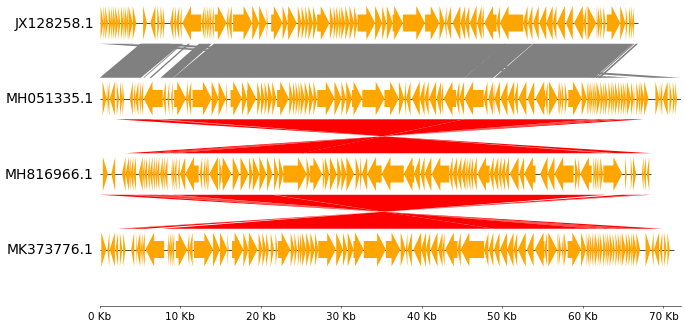

In [4]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(tick_style="axis")

gbk_files, links = load_dataset("phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk)

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2)

fig = gv.plotfig(dpi=50)


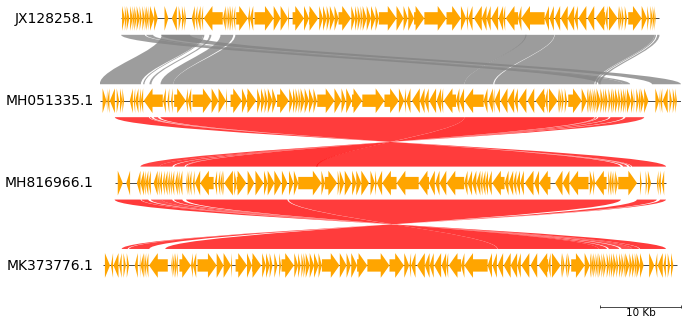

In [5]:
from pygenomeviz import Genbank, GenomeViz, load_dataset

gv = GenomeViz(
    feature_track_ratio=0.5,
    link_track_ratio=1.0,
    tick_track_ratio=0.5,
    tick_style="bar",
    align_type="center",
)

gbk_files, links = load_dataset("phage")
for gbk_file in gbk_files:
    gbk = Genbank(gbk_file)
    track = gv.add_feature_track(gbk.name, gbk.genome_length)
    track.add_genbank_features(gbk)

for link in links:
    link_data1 = (link.ref_name, link.ref_start, link.ref_end)
    link_data2 = (link.query_name, link.query_start, link.query_end)
    gv.add_link(link_data1, link_data2, interpolation_value=link.identity, alpha=0.8, curve=True)

fig = gv.plotfig(dpi=50)
